# Data Load

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
path = '../../../data/'
train = pd.read_csv(path + 'train_ratings.csv')
test = pd.read_csv(path + 'test_ratings.csv')
books = pd.read_csv(path + 'books.csv')
users = pd.read_csv(path + 'users.csv')

In [7]:
train

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9
...,...,...,...
306790,278843,0743525493,7
306791,278851,067161746X,6
306792,278851,0884159221,7
306793,278851,0912333022,7


In [8]:
books

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149565,067161746X,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987.0,Pocket Books,http://images.amazon.com/images/P/067161746X.0...,en,['Humor'],A tongue-in-cheek survival guide for single pe...,images/067161746X.01.THUMBZZZ.jpg
149566,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,en,['Nature'],A daring twist on the travel-adventure genre t...,images/0767907566.01.THUMBZZZ.jpg
149567,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,NaN,NaN,NaN,images/0884159221.01.THUMBZZZ.jpg
149568,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,en,['Fiction'],These hilarious stories by the creator of publ...,images/0912333022.01.THUMBZZZ.jpg


In [9]:
users

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0
...,...,...,...
68087,278376,"danville, pennsylvania, usa",54.0
68088,278621,"victoria, delaware, canada",74.0
68089,278636,"irvington, alabama, usa",NaN
68090,278659,"vancouver, washington, usa",33.0


# Basic EDA

## Ratings

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  306795 non-null  int64 
 1   isbn     306795 non-null  object
 2   rating   306795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [11]:
train.describe()

,user_id,rating
count,306795.000000,306795.000000
mean,136128.416099,7.069714
std,80512.194379,2.433217
min,8.000000,1.000000
25%,67591.000000,6.000000
50%,134076.000000,8.000000
75%,206438.000000,9.000000
max,278854.000000,10.000000


In [14]:
train.groupby('rating').count()

,user_id,isbn
rating,,
1,13249,13249
2,12929,12929
3,10520,10520
4,12707,12707
5,14111,14111
6,25311,25311
7,52928,52928
8,73593,73593
9,48673,48673


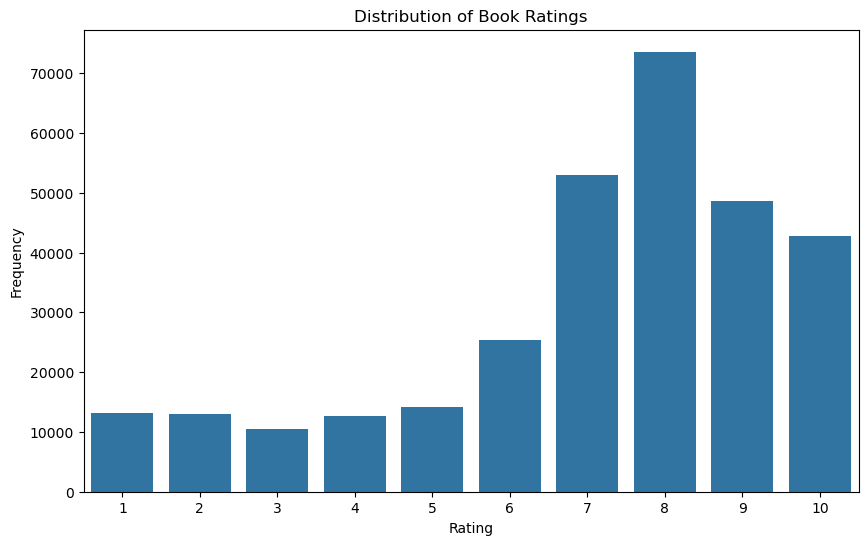

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train.groupby('rating').count(), x='rating', y='user_id')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- 8, 9, 10점 갯수만 해도 50퍼센트를 넘는다
- 평균은 7점이다
- 사람들의 점수가 후하다
- 얼마나 싫어하는지를 얼마나 좋아하는지 보다 더 자세히 알 수 있겠다

In [40]:
train['user_id'].value_counts().describe()

count    59803.000000
mean         5.130094
std         35.517624
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5520.000000
Name: count, dtype: float64

- 75퍼센트까지도 유저 당 평점의 개수가 3개 뿐이다 -> 이 사람들에 대해선 어떻게 학습 시킬 것인가
- 하는 사람만 많이 한다

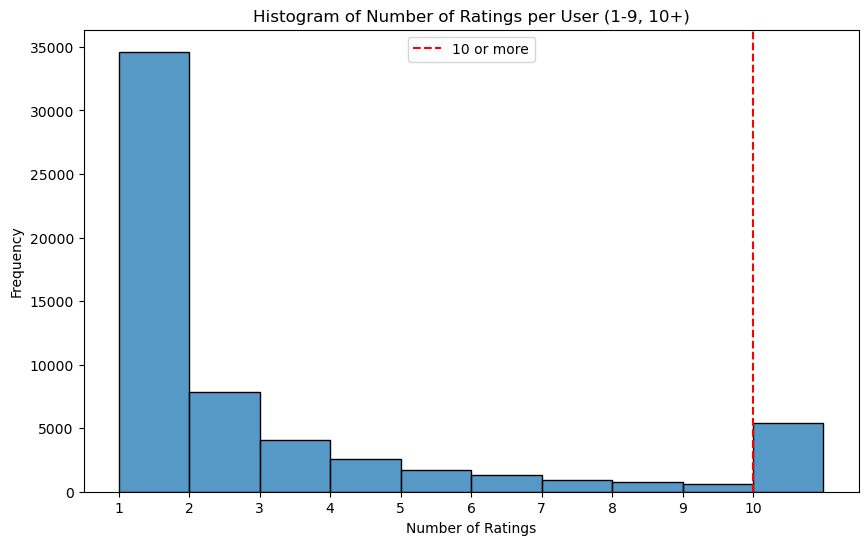

In [73]:
# 유저별 평점 개수 계산
user_rating_counts = train['user_id'].value_counts()

# 평점 개수를 10개 이상은 10으로 통일
user_rating_counts_adjusted = user_rating_counts.copy()
user_rating_counts_adjusted[user_rating_counts_adjusted >= 10] = 10

plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts_adjusted, bins=range(1, 12), kde=False)
plt.title('Histogram of Number of Ratings per User (1-9, 10+)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.axvline(x=10, color='red', linestyle='--', label='10 or more')
plt.legend()
plt.show()

- 10개 이상의 평점을 남긴 유저 수는 2개를 남긴 유저 수 보다 적다

In [78]:
top_1000_users = train['user_id'].value_counts().sort_values(ascending=False).head(1000).reset_index(drop=False)
top_1000_users

,user_id,count
0,11676,5520
1,98391,4560
2,189835,1503
3,153662,1496
4,23902,956
...,...,...
995,261037,46
996,163307,46
997,8936,46
998,247129,46


## Users

### location을 city, state, country로 분리하기

In [85]:
# location 컬럼을 분리하되, 결과가 3개의 값이 아닌 경우 처리
def split_location(location):
    if pd.isna(location):
        return pd.Series([np.nan, np.nan, np.nan])
    parts = location.split(',')
    if len(parts) == 3:
        return pd.Series([x.strip() for x in parts])
    else:
        return pd.Series([np.nan, np.nan, np.nan])

# location 분리 적용
users[['city', 'state', 'country']] = users['location'].apply(split_location)
users

,user_id,location,age,city,state,country
0,8,"timmins, ontario, canada",NaN,timmins,ontario,canada
1,11400,"ottawa, ontario, canada",49.0,ottawa,ontario,canada
2,11676,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
3,67544,"toronto, ontario, canada",30.0,toronto,ontario,canada
4,85526,"victoria, british columbia, canada",36.0,victoria,british columbia,canada
...,...,...,...,...,...,...
68087,278376,"danville, pennsylvania, usa",54.0,danville,pennsylvania,usa
68088,278621,"victoria, delaware, canada",74.0,victoria,delaware,canada
68089,278636,"irvington, alabama, usa",NaN,irvington,alabama,usa
68090,278659,"vancouver, washington, usa",33.0,vancouver,washington,usa


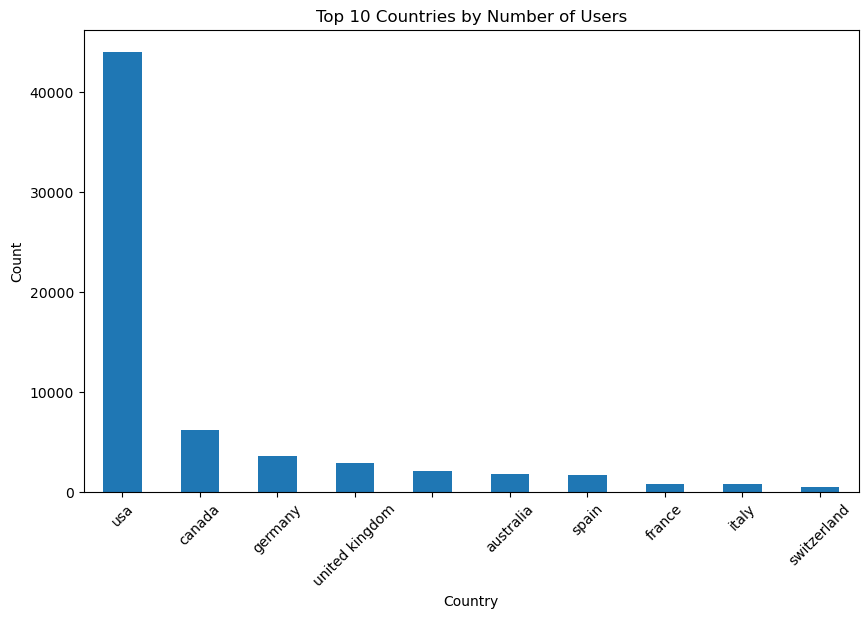

In [94]:
# 3. 국가별 분석
plt.figure(figsize=(10, 6))
users['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Users')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

역시나 미국, 그 뒤로 캐나다 독일 영국 결측치가 많았다

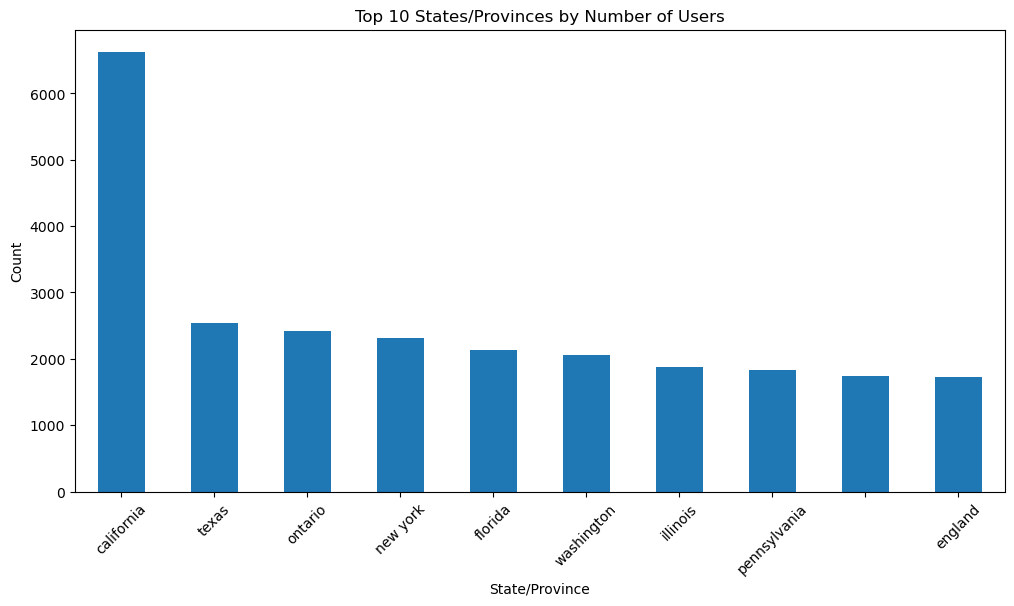

In [95]:
# 6. 주/도별 분석 (상위 10개)
plt.figure(figsize=(12, 6))
users['state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States/Provinces by Number of Users')
plt.xlabel('State/Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

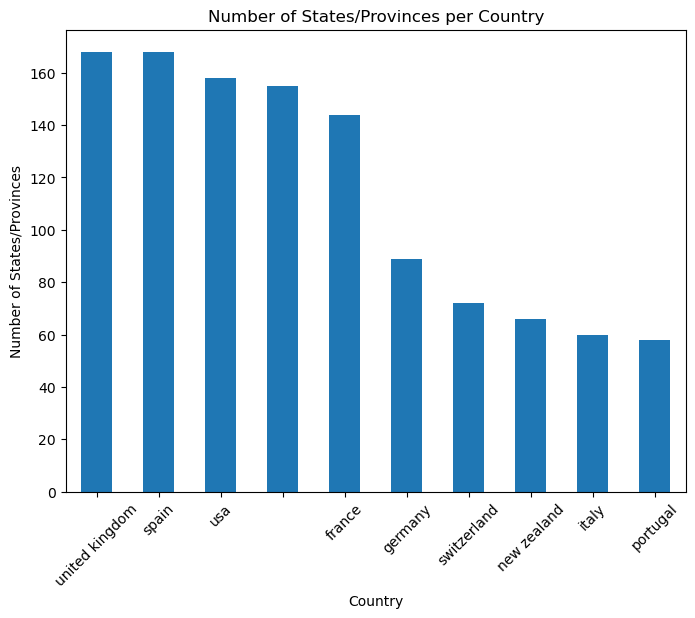

In [98]:
# 8. 국가별 주/도의 수
country_state_counts = users.groupby('country')['state'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
country_state_counts.plot(kind='bar')
plt.title('Number of States/Provinces per Country')
plt.xlabel('Country')
plt.ylabel('Number of States/Provinces')
plt.xticks(rotation=45)
plt.show()

유저 거주 지역의 다양성으로는 영국 스페인 프랑스도 미국에 뒤지지 않는다

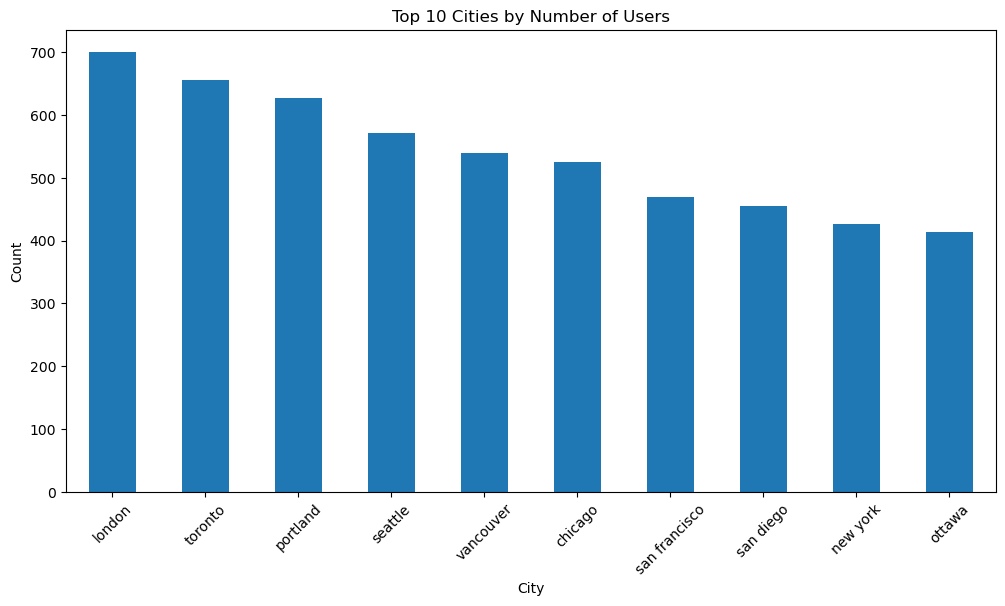

In [93]:
# 5. 상위 10개 도시 분석
plt.figure(figsize=(12, 6))
users['city'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Number of Users')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

단일 도시로 비교 했을 때에는 인구밀집도가 높은 도시들이 상위에 위치하는 것 같다

인구 밀집도가 높다면 사람들 사이에서 같은 책이 유행할 가능성이 크지 않을까?

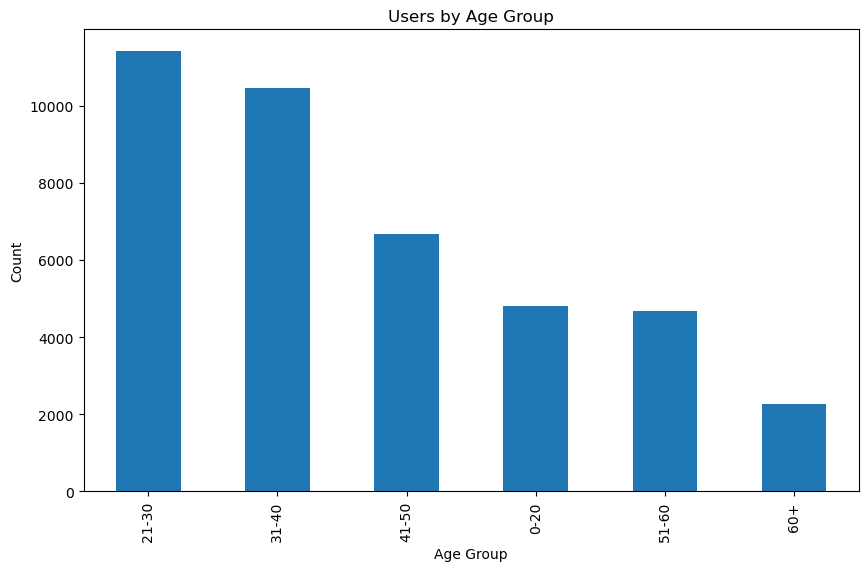

In [96]:
# 7. 연령대별 분석
users['age_group'] = pd.cut(users['age'], 
                        bins=[0, 20, 30, 40, 50, 60, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

plt.figure(figsize=(10, 6))
users['age_group'].value_counts().plot(kind='bar')
plt.title('Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

20대 30대가 제일 많은 점이 신기, 0-20, 20-40, 40+로 나눠보는건 어떨까?

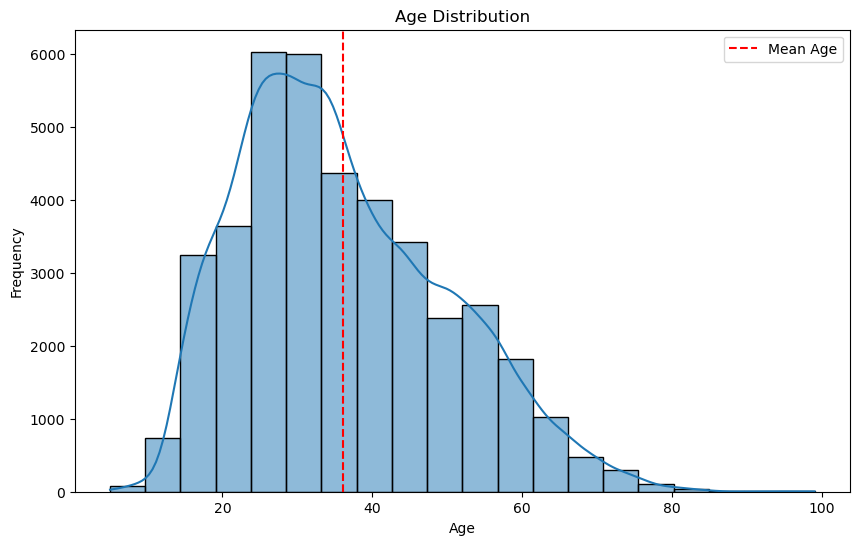

In [86]:
# 2. 나이 분포 분석
plt.figure(figsize=(10, 6))
sns.histplot(data=users, x='age', bins=20, kde=True)
plt.axvline(users['age'].mean(), color='r', linestyle='--', label='Mean Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [101]:
# 10. 통계 요약
print("\n나이 통계:")
print(users['age'].describe())


나이 통계:
count    40259.000000
mean        36.069873
std         13.842571
min          5.000000
25%         25.000000
50%         34.000000
75%         45.000000
max         99.000000
Name: age, dtype: float64


In [102]:
print("\n국가별 사용자 수:")
print(users['country'].value_counts())


국가별 사용자 수:
country
usa                 43988
canada               6208
germany              3526
united kingdom       2914
                     2090
                    ...  
richmond country        1
angola                  1
mongolia                1
ukraine                 1
algeria                 1
Name: count, Length: 244, dtype: int64


In [103]:
print("\n국가별 평균 나이:")
print(users.groupby('country')['age'].mean())


국가별 평균 나이:
country
               36.831554
\"n/a\""       54.000000
afghanistan    56.666667
alachua        60.000000
albania              NaN
                 ...    
worcester            NaN
ysa            32.000000
yugoslavia     22.000000
zambia         55.000000
zimbabwe       62.000000
Name: age, Length: 244, dtype: float64


## Books

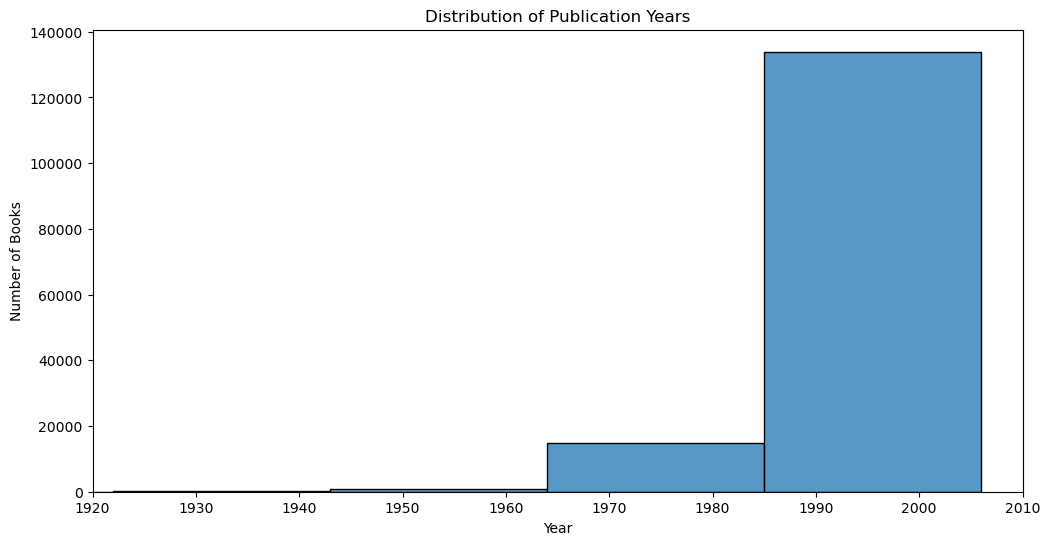

In [106]:
# 1. 출판 연도 분석
plt.figure(figsize=(12, 6))
sns.histplot(data=books, x='year_of_publication', bins=30)
plt.xlim(1920, 2010)
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

1980년도 이후의 책이 대다수

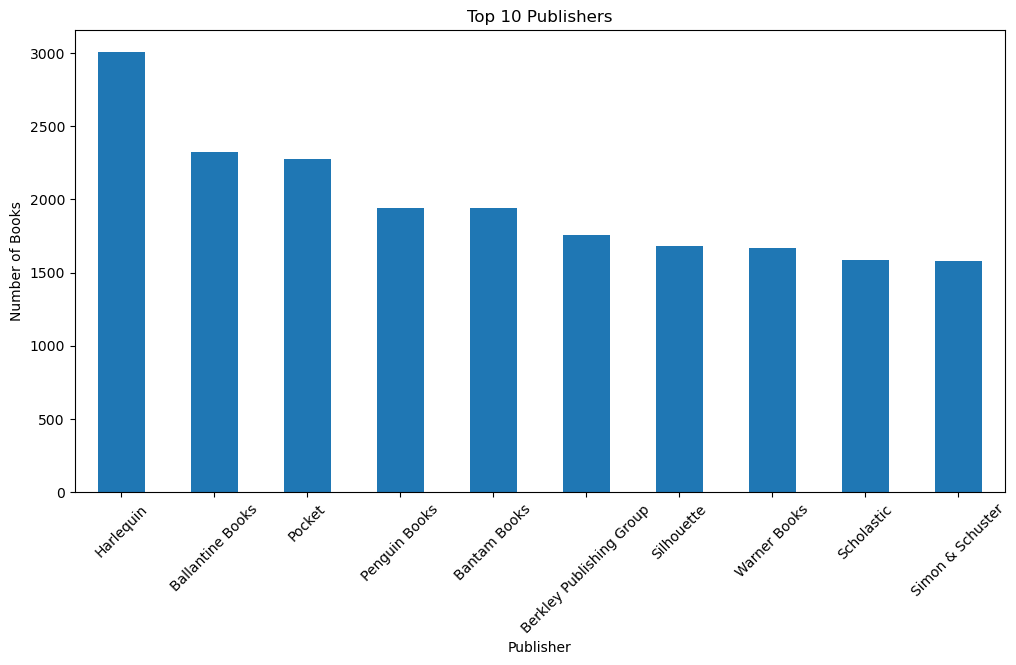

In [107]:
# 2. 상위 출판사 분석
plt.figure(figsize=(12, 6))
books['publisher'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

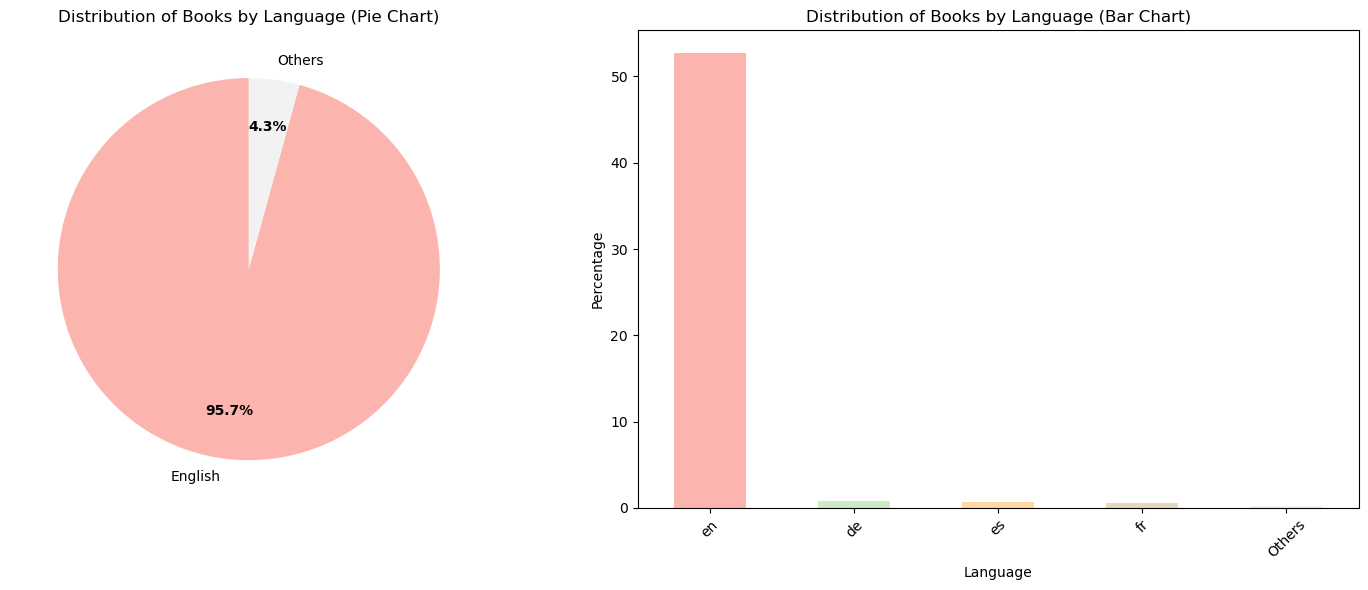

In [122]:
# 언어별 비율 계산
language_counts = books['language'].value_counts()
total_books = len(books)
language_percentages = (language_counts / total_books) * 100

# 0.5% 미만인 언어들을 'Others'로 묶기
threshold = 0.5
small_languages = language_percentages[language_percentages < threshold].sum()
main_languages = language_percentages[language_percentages >= threshold]
final_languages = pd.concat([main_languages, pd.Series({'Others': small_languages})])

# 파이 차트용 간단 데이터 (영어/Others)
en_percentage = language_percentages['en']
others_percentage = language_percentages[language_percentages.index != 'en'].sum()
pie_data = pd.Series({'English': en_percentage, 'Others': others_percentage})

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 파이 그래프 (영어/Others만)
colors_pie = plt.cm.Pastel1(np.linspace(0, 1, len(pie_data)))
wedges, texts, autotexts = ax1.pie(pie_data, 
                                  labels=pie_data.index, 
                                  autopct='%1.1f%%',
                                  colors=colors_pie, 
                                  startangle=90,
                                  labeldistance=1.1,
                                  pctdistance=0.75)

plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

ax1.set_title('Distribution of Books by Language (Pie Chart)')

# 바 그래프 (0.5% 이상 언어들 + Others)
colors_bar = plt.cm.Pastel1(np.linspace(0, 1, len(final_languages)))
final_languages.plot(kind='bar', ax=ax2, color=colors_bar)
ax2.set_title('Distribution of Books by Language (Bar Chart)')
ax2.set_xlabel('Language')
ax2.set_ylabel('Percentage')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


영어가 절대적, 독일어 스페인어 프랑스어가 조금 있는 듯?

언어는 모르면 안 읽을테니까 절대적인 피처

그러나 결측치가 많아 잘 추정하면 도움이 될 것 같다, 영어로 쭉 다 밀어도 95퍼 정확도 이긴 하겠지만

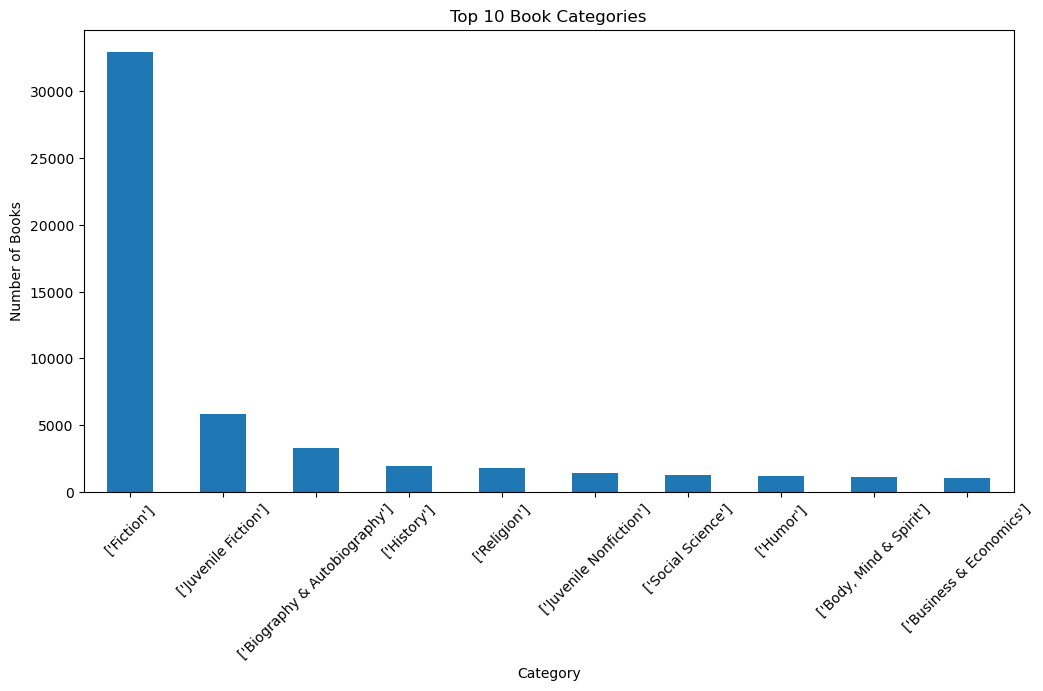

In [118]:
# 4. 카테고리 분석
# 카테고리가 리스트 형태로 저장되어 있으므로 풀어서 분석
categories = books['category'].dropna().explode()
plt.figure(figsize=(12, 6))
categories.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

소설, 아동소설? 결국 소설이 지배적이다

소설을 좋아하는 사람 간에는 어떤 소설을 추천해줘야 할지 감이 안오지만

오히려 마이너한 장르를 좋아하는 사람들에게는 그 장르를 추천해주면 잘 먹힐 가능성이 클까?

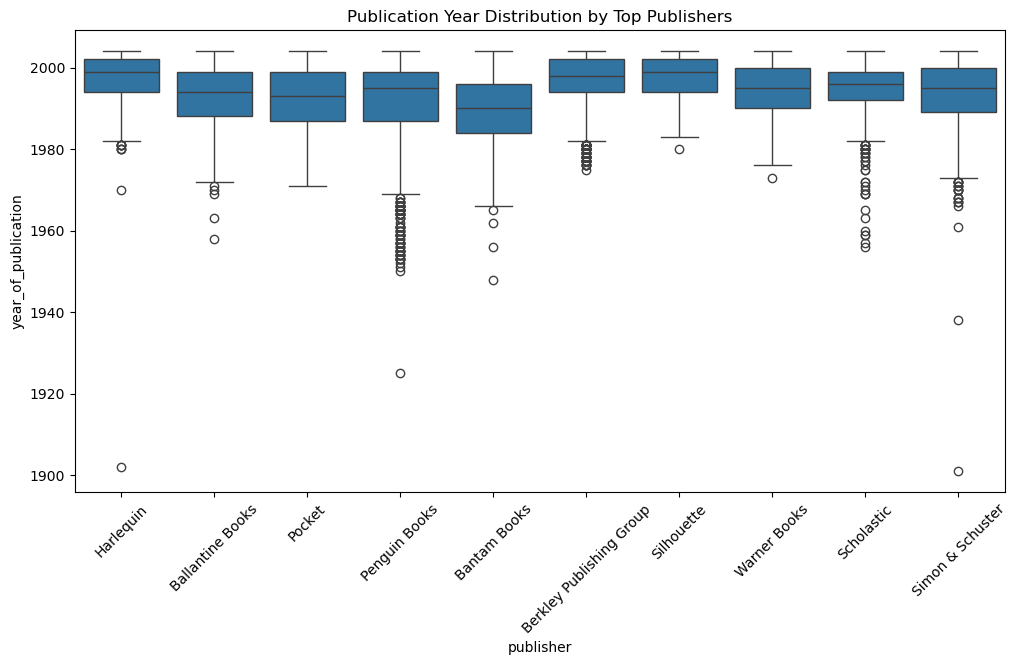

In [129]:
# 5. 연도별 출판사 트렌드
plt.figure(figsize=(12, 6))
sns.boxplot(data=books, x='publisher', y='year_of_publication', 
            order=books['publisher'].value_counts().head(10).index)
plt.title('Publication Year Distribution by Top Publishers')
plt.xticks(rotation=45)
plt.show()

출판사 별 출시일에 따라, 즉 출판사가 언제부터 활동 했는지를 알면 그 출판사의 성향을 추측하는데에 도움이 될까? 아직은 모르겠다

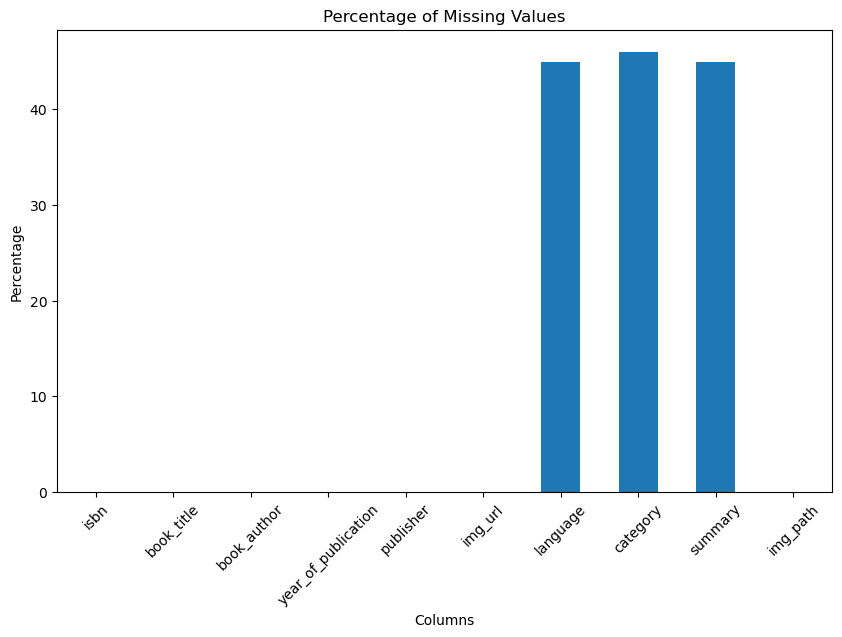

In [130]:
# 6. 결측치 분석
plt.figure(figsize=(10, 6))
missing_data = (books.isnull().sum() / len(books)) * 100
missing_data.plot(kind='bar')
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

언어, 카테고리, 요약에 대해 결측치가 너무 많다

언어와 카테고리는 뭐 어케어케 한다고 해도 줄거리는 외부 데이터 없이는 채울 방도가 없다

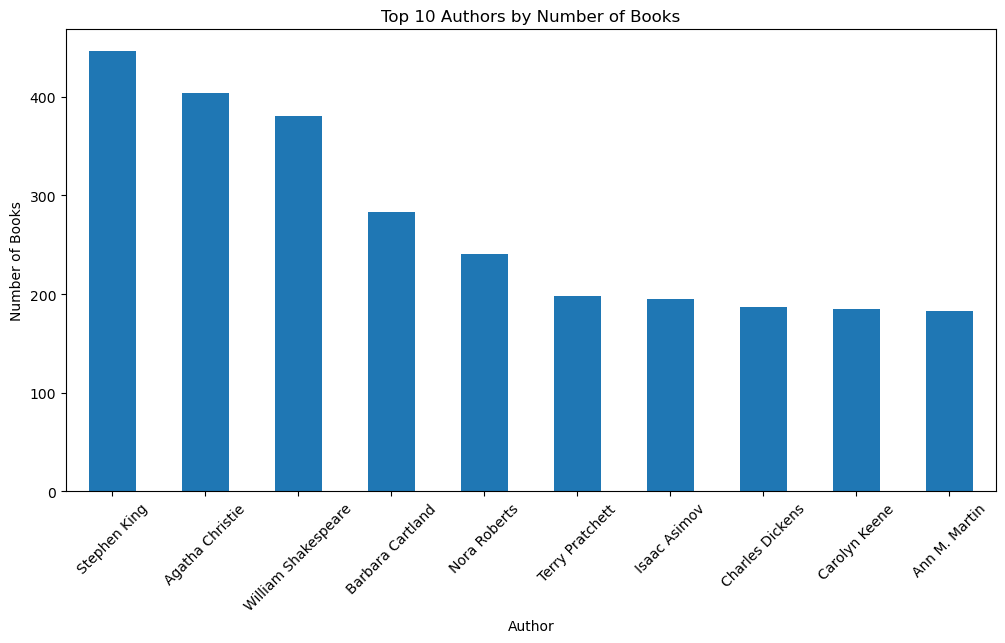

In [131]:
# 8. 작가별 출판 도서 수
plt.figure(figsize=(12, 6))
books['book_author'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

스티븐 킹 형님의 책을 읽고 싶당 책 많이 쓰셨네

작가는 확실히 중요한 피처일 것 같다

<Figure size 1000x600 with 0 Axes>

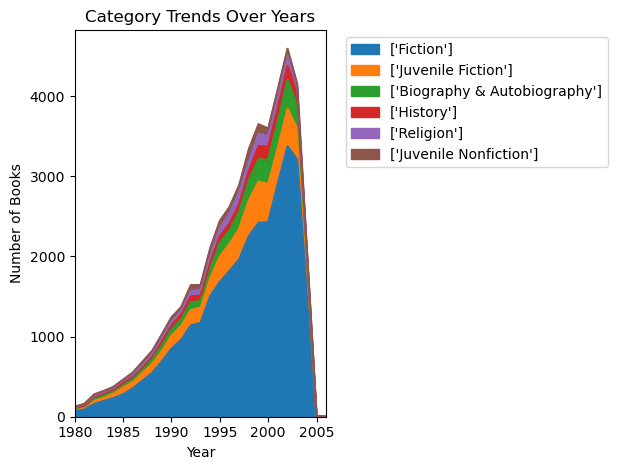


상위 6개 카테고리별 전체 도서 수:
category
['Fiction']                      32956
['Juvenile Fiction']              5804
['Biography & Autobiography']     3320
['History']                       1925
['Religion']                      1818
['Juvenile Nonfiction']           1417
dtype: int64


In [139]:
# 9. 연도별 카테고리 트렌드
# 특정 연도 범위에서 카테고리 분포 변화
# category 컬럼 처리 (리스트 형태의 데이터를 풀어서 처리)
books_exploded = books.explode('category')

# 연도별, 카테고리별 도서 수 계산
year_cat = books_exploded.groupby(['year_of_publication', 'category']).size().unstack(fill_value=0)

# 가장 많은 도서가 있는 상위 6개 카테고리만 선택
top_categories = year_cat.sum().nlargest(6).index

# 선택된 카테고리에 대해서만 그래프 그리기
plt.figure(figsize=(10, 6))
year_cat[top_categories].plot(kind='area', stacked=True)
plt.xlim(1980,2006)
plt.title('Category Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 결과 출력
print("\n상위 6개 카테고리별 전체 도서 수:")
print(year_cat[top_categories].sum().sort_values(ascending=False))

<Figure size 1200x600 with 0 Axes>

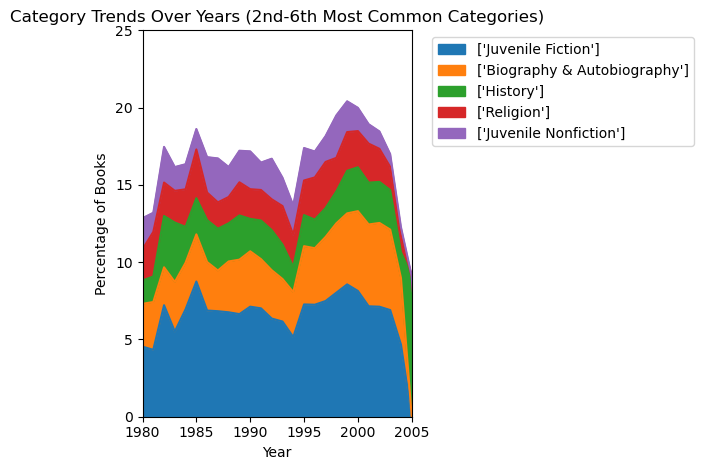


2-6위 카테고리별 평균 비율:
category
['Juvenile Fiction']             16.002202
['Religion']                      4.152150
['History']                       2.872791
['Biography & Autobiography']     2.072424
['Juvenile Nonfiction']           1.043691
dtype: float64


In [143]:
# category 컬럼 처리
books_exploded = books.explode('category')

# 연도별, 카테고리별 도서 수 계산
year_cat = books_exploded.groupby(['year_of_publication', 'category']).size().unstack(fill_value=0)

# 각 연도별로 퍼센트로 변환
year_cat_pct = year_cat.div(year_cat.sum(axis=1), axis=0) * 100

# 카테고리별 전체 도서 수 계산하여 2-6위 카테고리 선택
top_categories = year_cat.sum().nlargest(6).index[1:]  # 1위 제외, 2-6위 선택

# 선택된 카테고리에 대해서만 그래프 그리기
plt.figure(figsize=(12, 6))
year_cat_pct[top_categories].plot(kind='area', stacked=True)
plt.xlim(1980,2005)
plt.ylim(0,25)
plt.title('Category Trends Over Years (2nd-6th Most Common Categories)')
plt.xlabel('Year')
plt.ylabel('Percentage of Books')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 결과 출력
print("\n2-6위 카테고리별 평균 비율:")
print(year_cat_pct[top_categories].mean().sort_values(ascending=False))


In [134]:
# 10. 통계 요약
print("\n출판 연도 통계:")
print(books['year_of_publication'].describe())


출판 연도 통계:
count    149570.000000
mean       1994.590606
std           8.179733
min        1376.000000
25%        1991.000000
50%        1996.000000
75%        2000.000000
max        2006.000000
Name: year_of_publication, dtype: float64


# 추가 EDA